In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [58]:
training_set = pd.read_csv('titanic.csv')

In [59]:
training_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
training_set.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
training_set.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [62]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
     

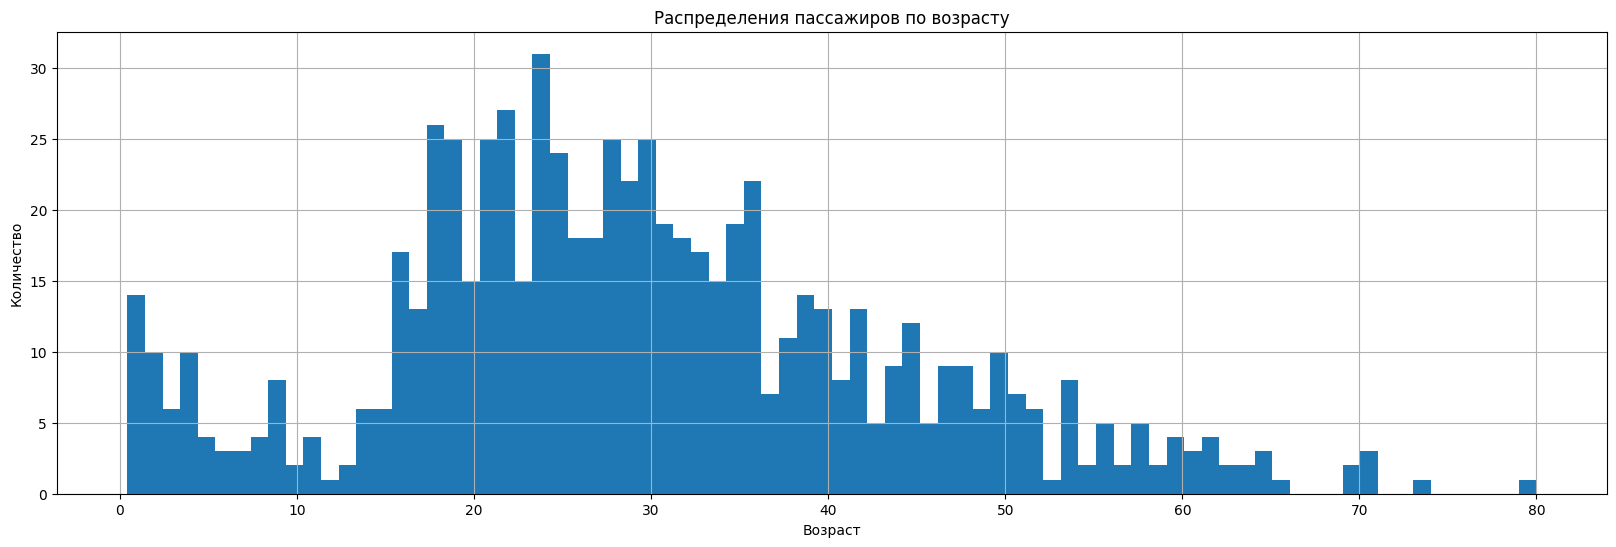

In [63]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')


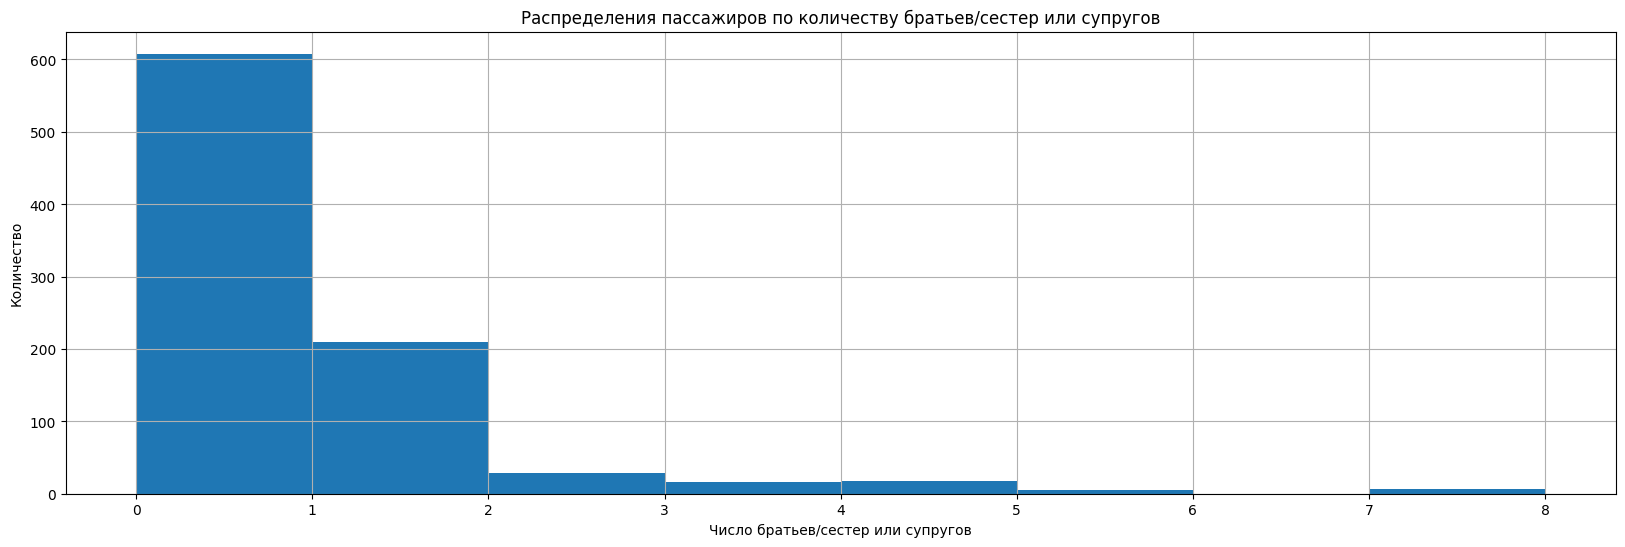

In [64]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов',
  'Число братьев/сестер или супругов')

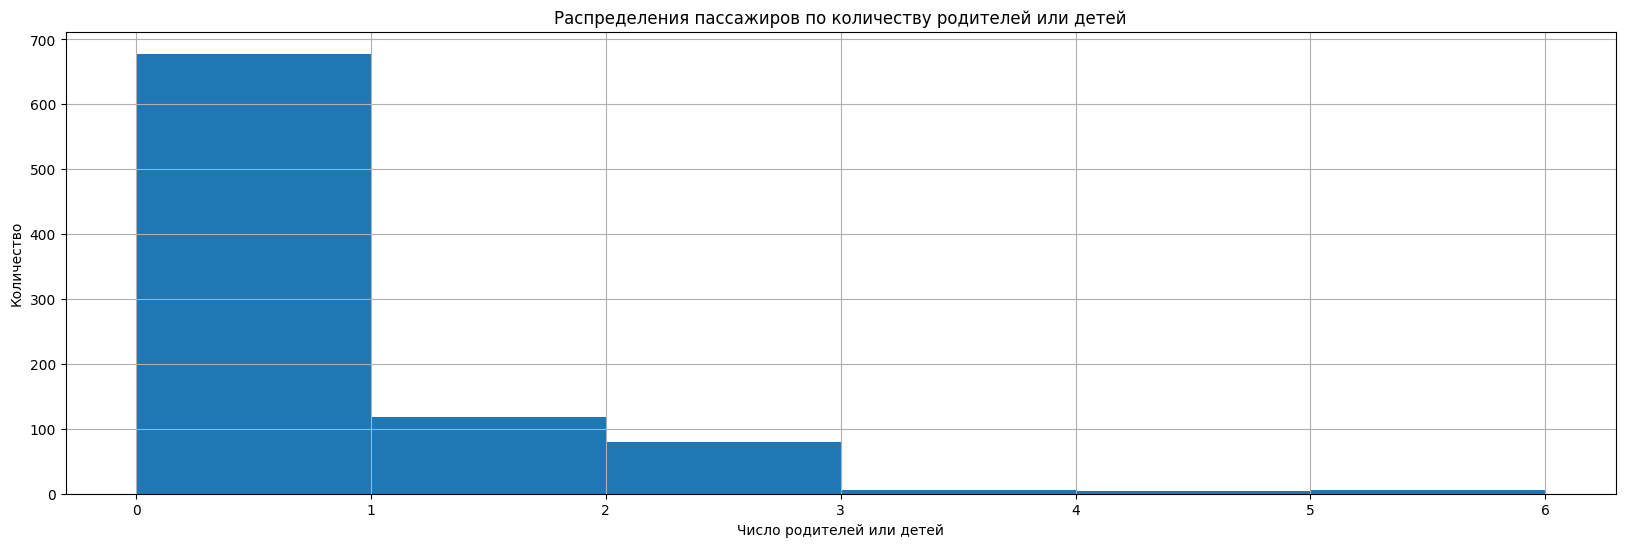

In [65]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей',
  'Число родителей или детей')

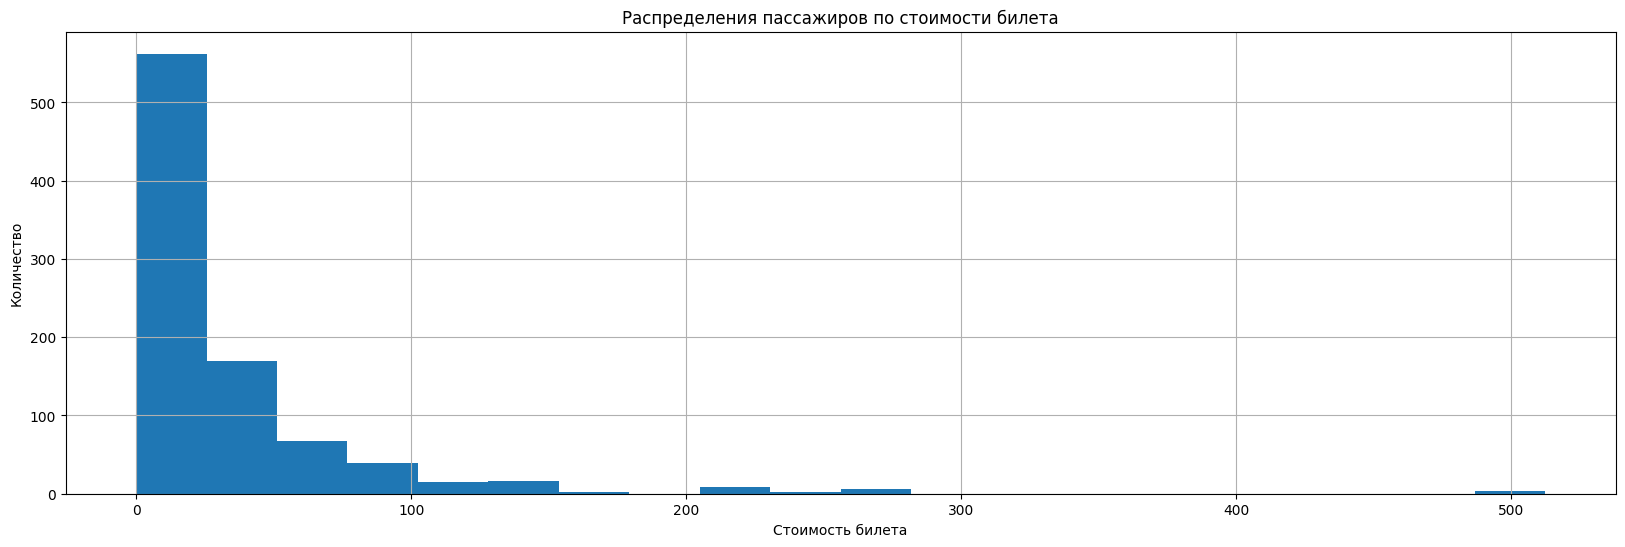

In [66]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета',
  'Стоимость билета', bins=20)

<Axes: ylabel='Frequency'>

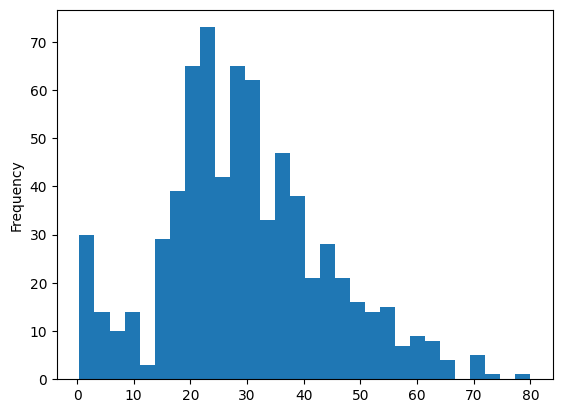

In [67]:
training_set['Age'].plot.hist(bins=30)


<Axes: xlabel='SibSp', ylabel='count'>

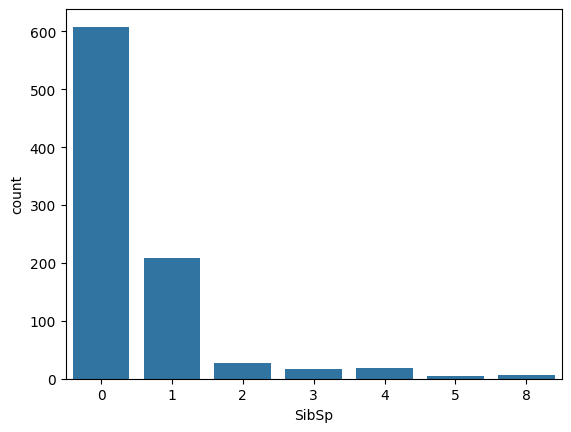

In [68]:
sns.countplot(x='SibSp', data=training_set)


In [69]:
training_set['Fare']


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<Axes: >

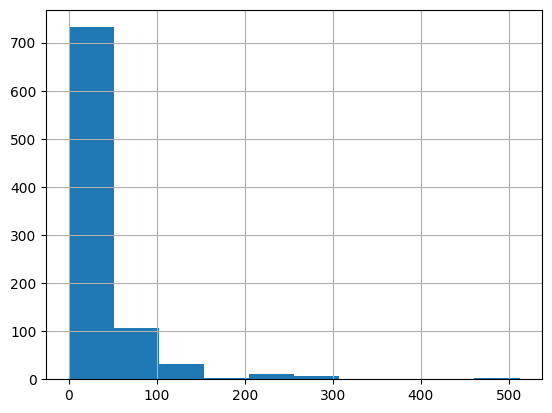

In [70]:
training_set['Fare'].hist()


<Axes: >

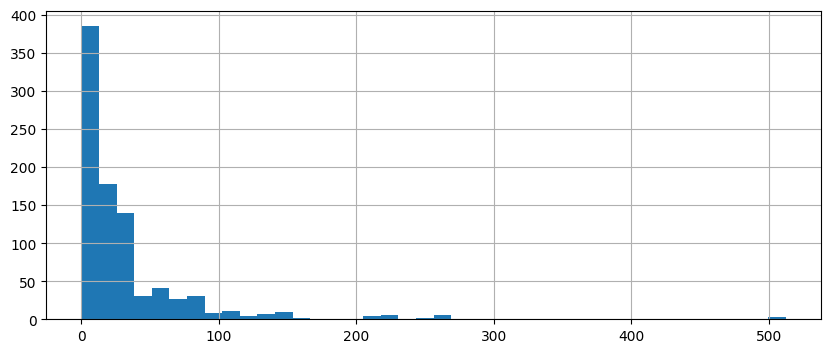

In [71]:
training_set['Fare'].hist(bins=40, figsize=(10,4))


<Axes: xlabel='Survived', ylabel='count'>

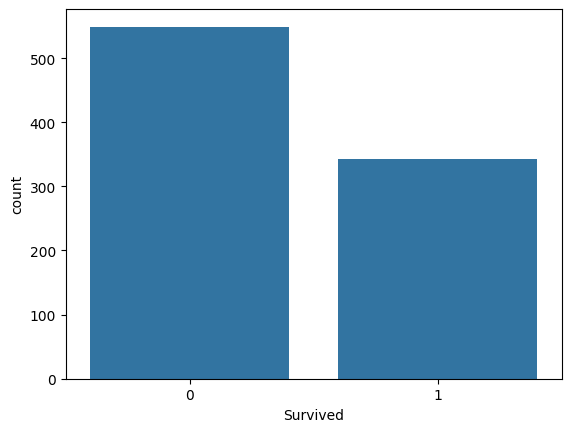

In [72]:
sns.countplot(x='Survived', data=training_set)


<Axes: xlabel='Survived', ylabel='count'>

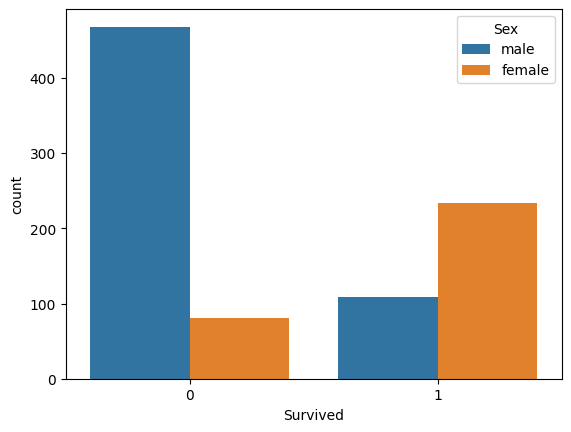

In [73]:
sns.countplot(x='Survived', data=training_set, hue='Sex')


<Axes: xlabel='Survived', ylabel='count'>

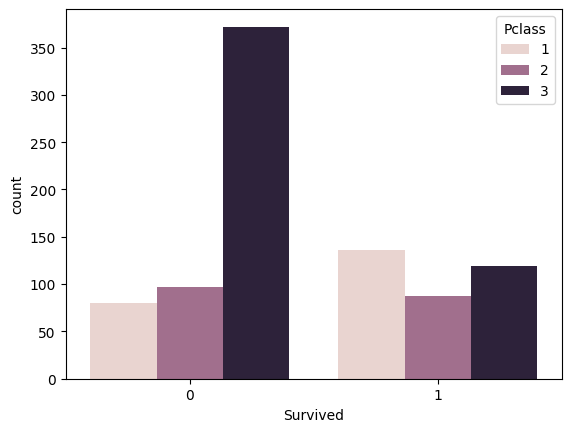

In [74]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')


<Axes: xlabel='Pclass', ylabel='Age'>

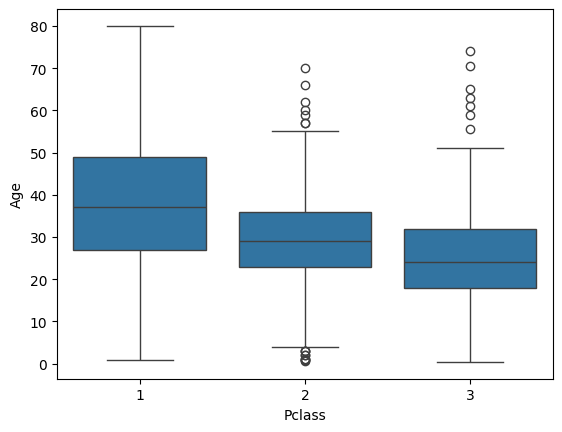

In [75]:
sns.boxplot(x='Pclass', y='Age', data=training_set)


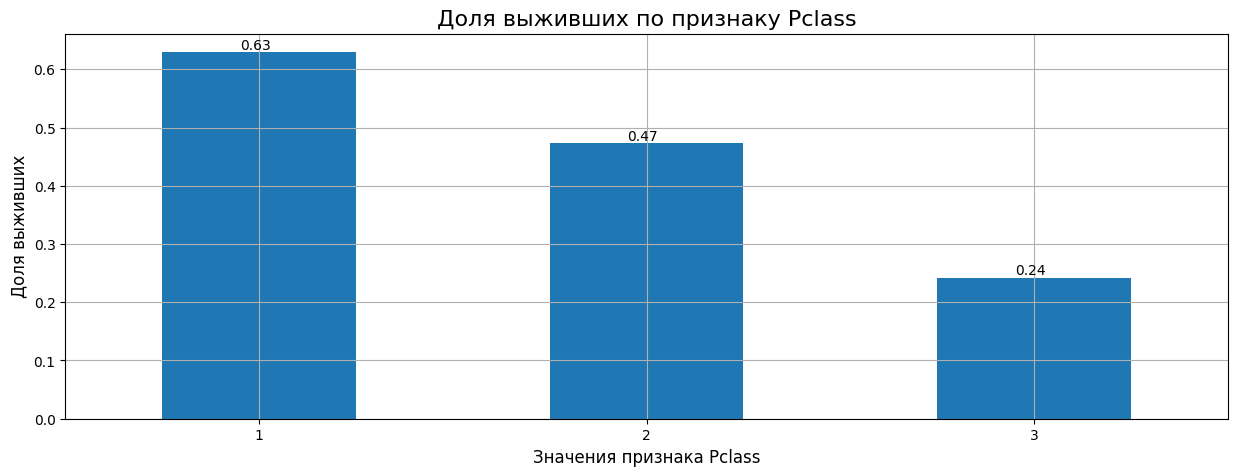

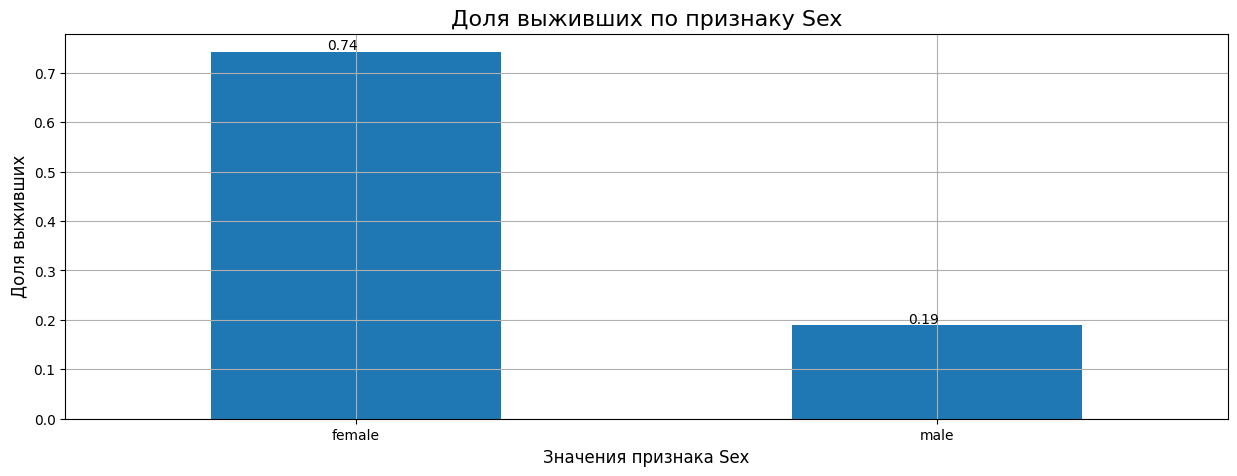

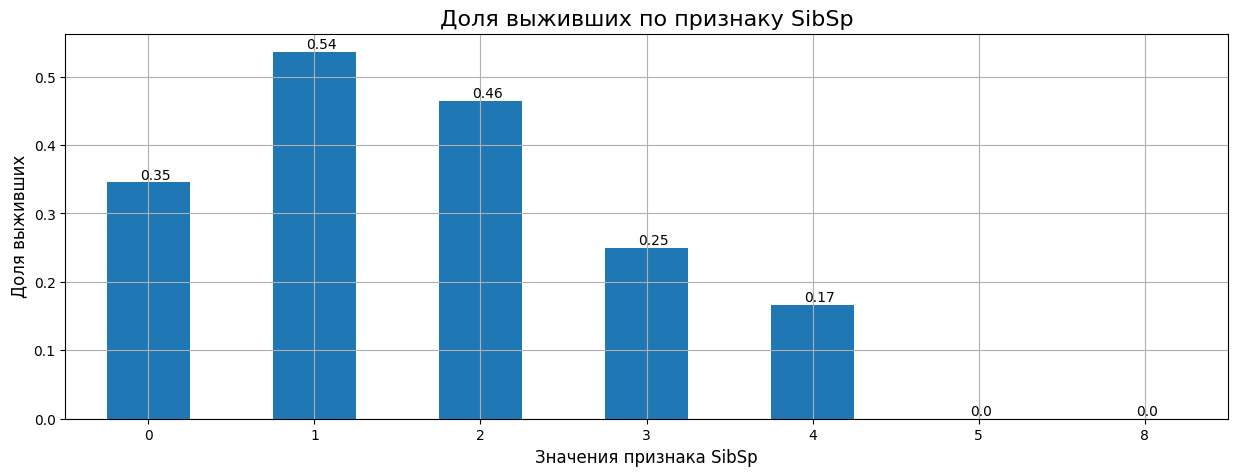

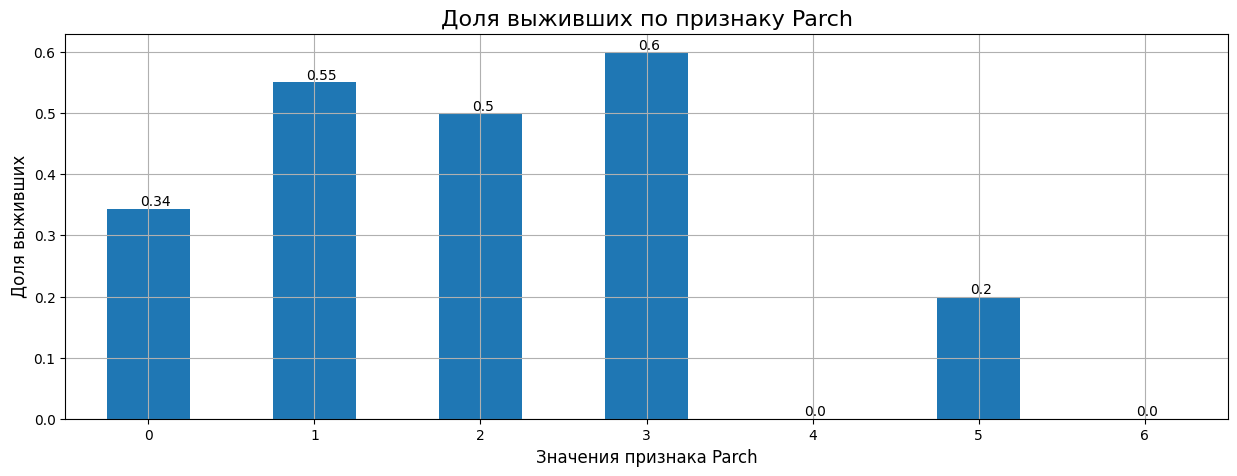

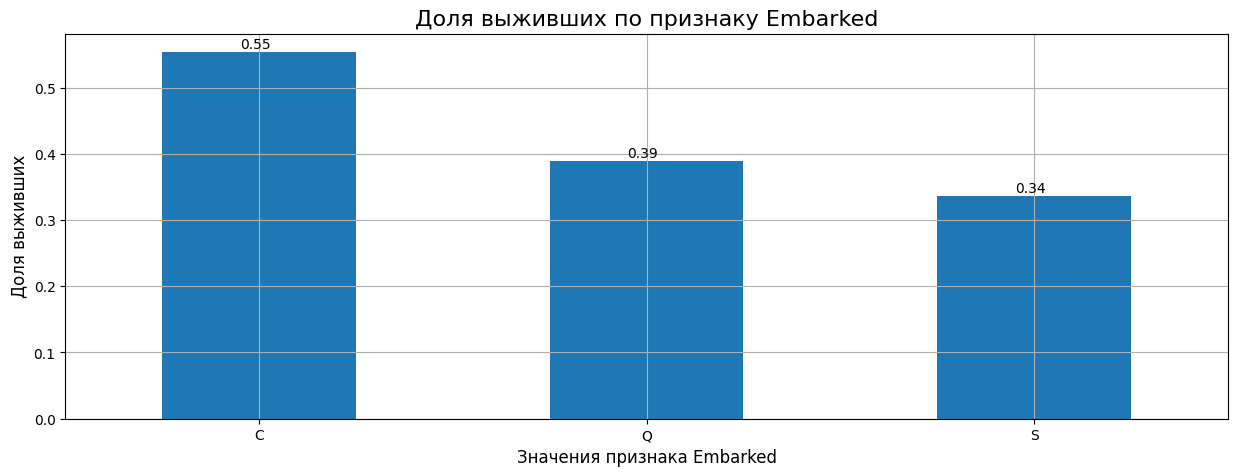

In [76]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')

    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})

    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))

    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax)
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

In [77]:
training_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
training_set.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
training_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

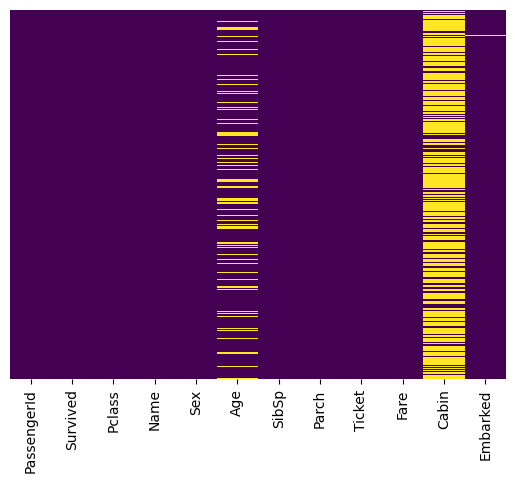

In [81]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')


<Axes: >

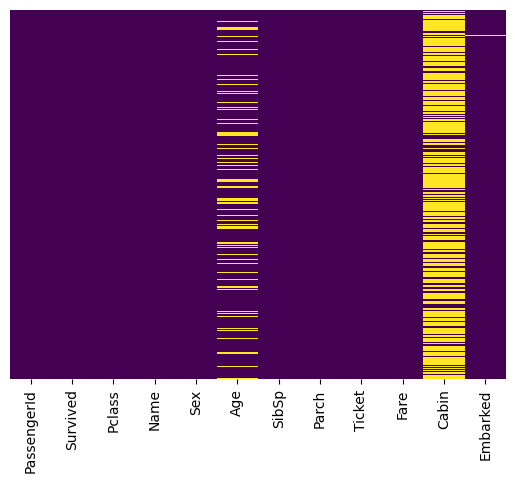

In [82]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [83]:
training_set.drop('Cabin', axis=1, inplace=True)


In [84]:
training_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

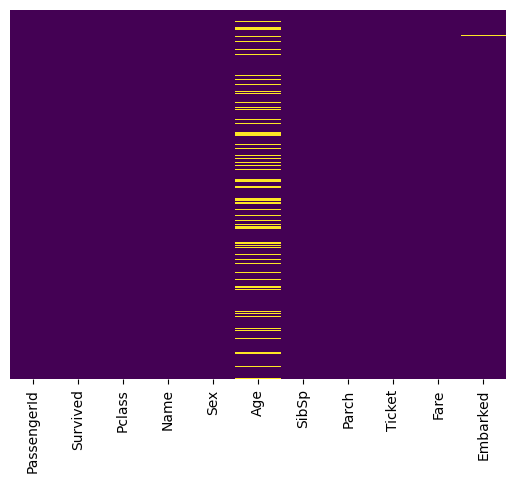

In [85]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [86]:
training_set.dropna(inplace=True)


In [87]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])

In [88]:
training_set['Sex'].unique()


array(['male', 'female'], dtype=object)

In [89]:
np.unique(cat_enc_le)


array([0, 1])

In [90]:
le.inverse_transform([0,1])


array(['female', 'male'], dtype=object)

In [91]:
ohe = OneHotEncoder()
# Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']]) 
     

In [92]:
training_set.shape


(712, 11)

In [93]:
cat_enc_ohe.shape


(712, 3)

In [94]:
pd.get_dummies(training_set['Sex'])


,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [95]:
pd.get_dummies(training_set['Sex'], drop_first=True)


,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [96]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)


In [97]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)


In [98]:
embark.head()


,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [99]:
training_set = pd.concat([training_set, sex, embark], axis=1)


In [100]:
training_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [101]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [102]:
training_set.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [103]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [105]:
X = training_set.drop('Survived', axis=1)
y = training_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[73  7]
 [22 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:

In [106]:
training_set = pd.read_csv('titanic.csv')


3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

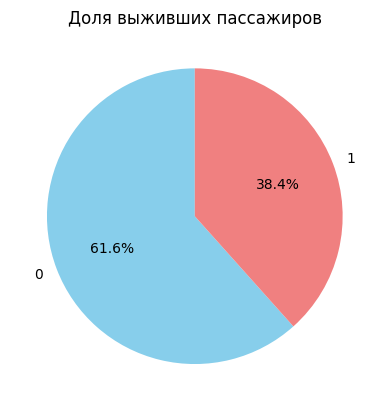

In [107]:
# Доля выживших
survived_counts = training_set['Survived'].value_counts()
survived_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Доля выживших пассажиров')
plt.ylabel('')
plt.show()


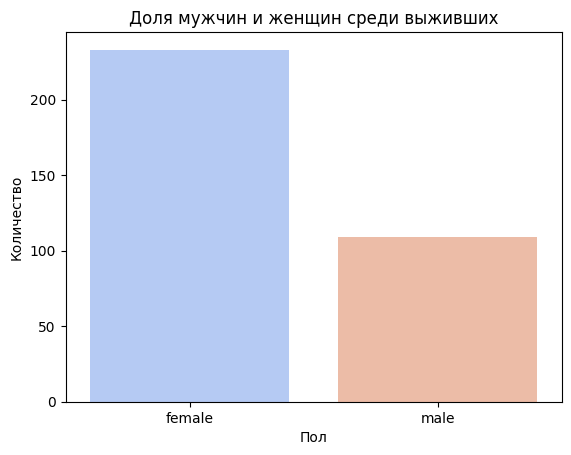

In [108]:
# Доля мужчин и женщин среди выживших

survived_gender = training_set[training_set['Survived'] == 1]['Sex'].value_counts()
sns.barplot(x=survived_gender.index, y=survived_gender.values, palette='coolwarm')
plt.title('Доля мужчин и женщин среди выживших')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

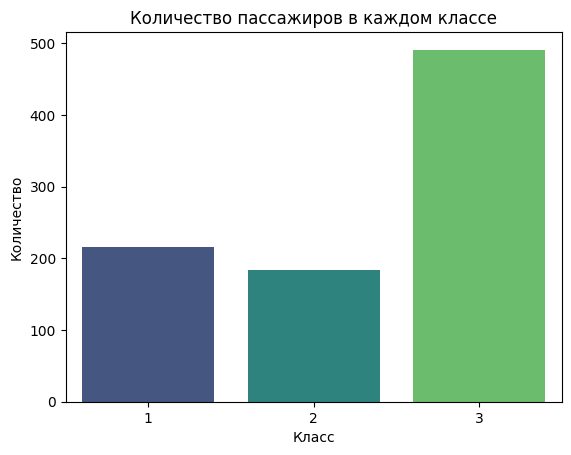

In [109]:
# Количество пассажиров в каждом классе
class_counts = training_set['Pclass'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Количество пассажиров в каждом классе')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()


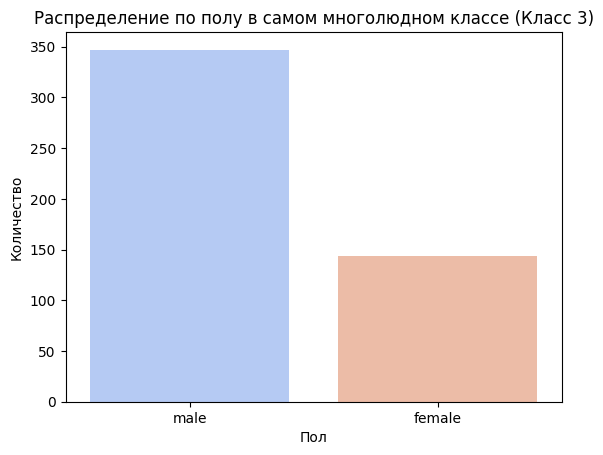

In [110]:
# Анализ самого многолюдного класса
most_populous_class = training_set['Pclass'].value_counts().idxmax()
most_populous_class_gender = training_set[training_set['Pclass'] == most_populous_class]['Sex'].value_counts()
sns.barplot(x=most_populous_class_gender.index, y=most_populous_class_gender.values, palette='coolwarm')
plt.title(f'Распределение по полу в самом многолюдном классе (Класс {most_populous_class})')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [111]:
training_set.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

Корреляция между Fare и Age: 0.10


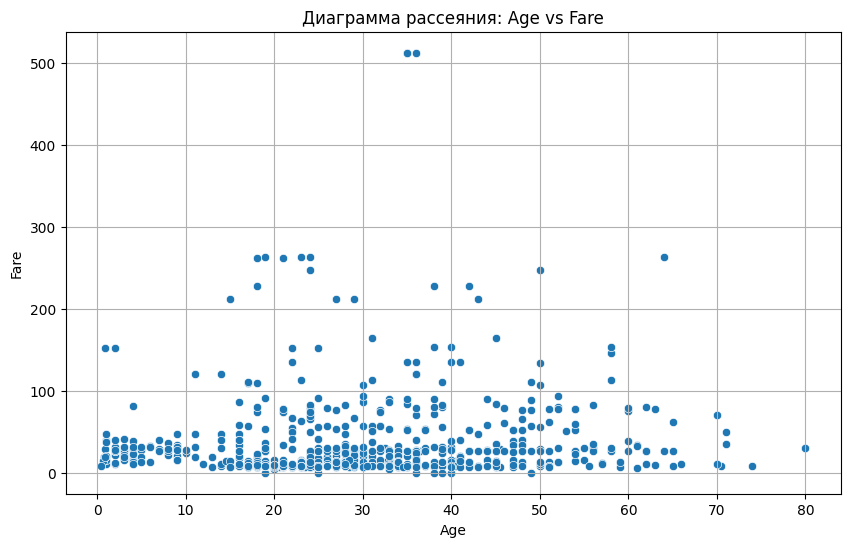

In [112]:
# 1. Посчитать корреляцию между Fare и Age
correlation = training_set[['Fare', 'Age']].corr().iloc[0, 1]
print(f'Корреляция между Fare и Age: {correlation:.2f}')

# 2. Построить диаграмму рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=training_set, x='Age', y='Fare')
plt.title('Диаграмма рассеяния: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

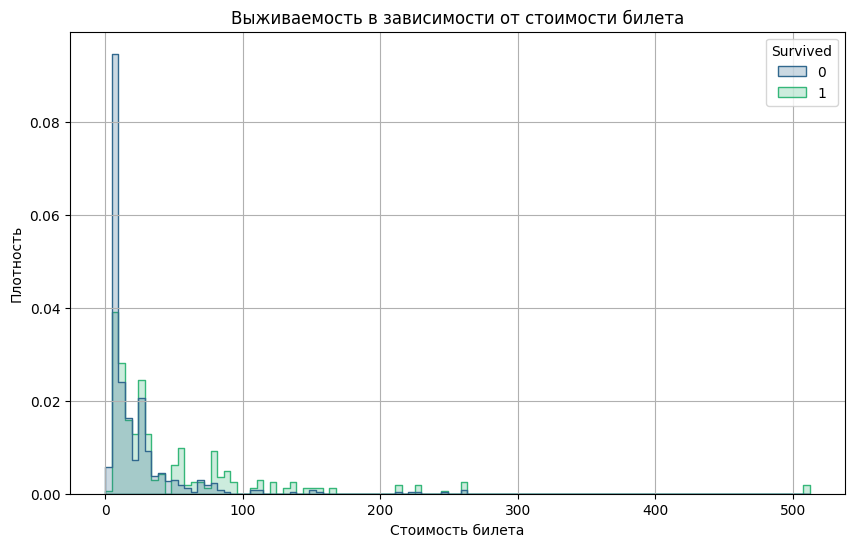

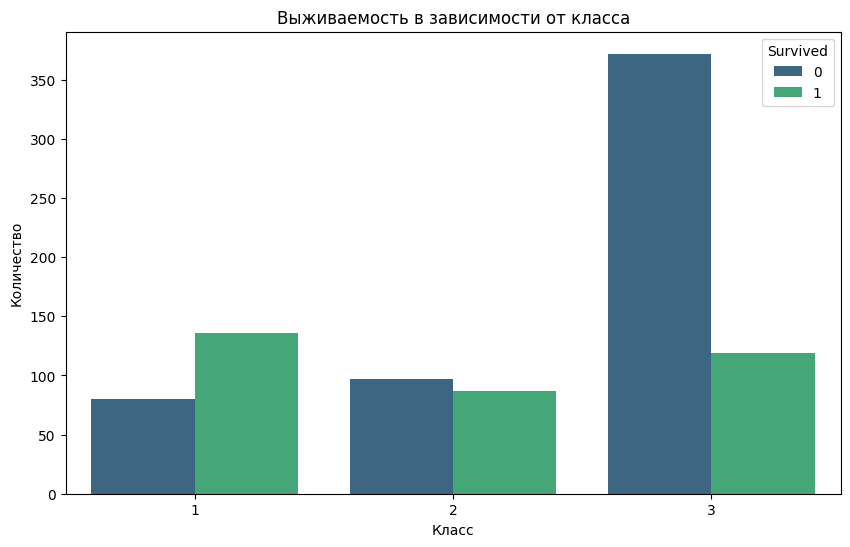

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Проверка зависимости выживаемости от стоимости билета
plt.figure(figsize=(10, 6))
sns.histplot(data=training_set, x='Fare', hue='Survived', element='step', stat='density', common_norm=False, palette='viridis')
plt.title('Выживаемость в зависимости от стоимости билета')
plt.xlabel('Стоимость билета')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

# Проверка зависимости выживаемости от класса
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=training_set, palette='viridis')
plt.title('Выживаемость в зависимости от класса')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()


8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

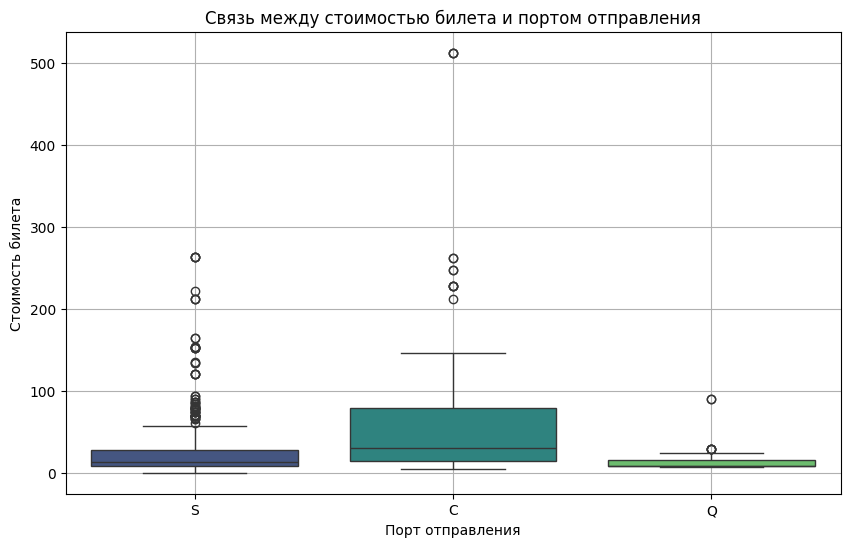

Минимальная сумма за проезд (все пассажиры): 0.00
Средняя сумма за проезд (все пассажиры): 32.20
Максимальная сумма за проезд (все пассажиры): 512.33
Минимальная сумма за проезд (Саутгемптон): 0.00
Средняя сумма за проезд (Саутгемптон): 27.08
Максимальная сумма за проезд (Саутгемптон): 263.00


In [114]:
# Связь между стоимостью билета и портом отправления
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', data=training_set, palette='viridis')
plt.title('Связь между стоимостью билета и портом отправления')
plt.xlabel('Порт отправления')
plt.ylabel('Стоимость билета')
plt.grid(True)
plt.show()

# Минимальная, средняя и максимальная сумма за проезд для всех пассажиров
fare_stats_all = training_set['Fare'].agg(['min', 'mean', 'max'])
print(f"Минимальная сумма за проезд (все пассажиры): {fare_stats_all['min']:.2f}")
print(f"Средняя сумма за проезд (все пассажиры): {fare_stats_all['mean']:.2f}")
print(f"Максимальная сумма за проезд (все пассажиры): {fare_stats_all['max']:.2f}")

# Минимальная, средняя и максимальная сумма за проезд для пассажиров, севших в Саутгемптоне
fare_stats_southampton = training_set[training_set['Embarked'] == 'S']['Fare'].agg(['min', 'mean', 'max'])
print(f"Минимальная сумма за проезд (Саутгемптон): {fare_stats_southampton['min']:.2f}")
print(f"Средняя сумма за проезд (Саутгемптон): {fare_stats_southampton['mean']:.2f}")
print(f"Максимальная сумма за проезд (Саутгемптон): {fare_stats_southampton['max']:.2f}")

9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

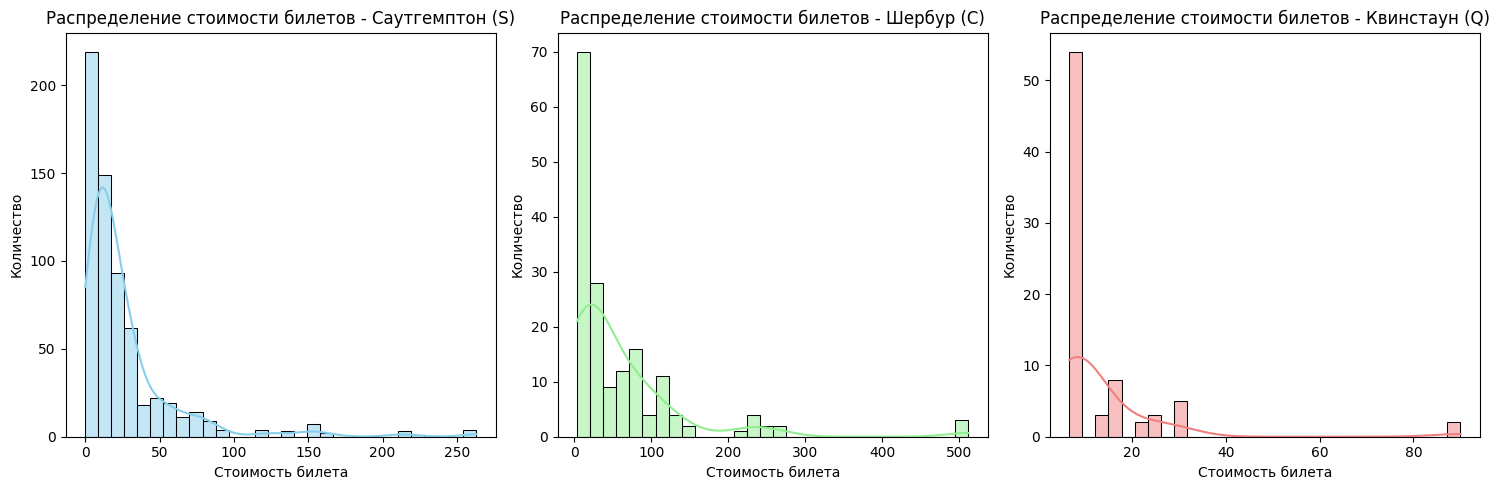

In [116]:
# Гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки
plt.figure(figsize=(15, 5))

# Саутгемптон (S)
plt.subplot(1, 3, 1)
sns.histplot(training_set[training_set['Embarked'] == 'S']['Fare'], bins=30, kde=True, color='skyblue')
plt.title('Распределение стоимости билетов - Саутгемптон (S)')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')

# Шербур (C)
plt.subplot(1, 3, 2)
sns.histplot(training_set[training_set['Embarked'] == 'C']['Fare'], bins=30, kde=True, color='lightgreen')
plt.title('Распределение стоимости билетов - Шербур (C)')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')

# Квинстаун (Q)
plt.subplot(1, 3, 3)
sns.histplot(training_set[training_set['Embarked'] == 'Q']['Fare'], bins=30, kde=True, color='lightcoral')
plt.title('Распределение стоимости билетов - Квинстаун (Q)')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

In [119]:
# Количество записей в наборе данных
total_passengers = len(training_set)
# Количество выживших в наборе данных
total_survived = training_set['Survived'].sum()

print(f'Всего пассажиров в наборе данных: {total_passengers}')
print(f'Всего выживших в наборе данных: {total_survived}')

# Общее количество пассажиров на Титанике
total_passengers_titanic = 2224
# Общее количество выживших на Титанике
total_survived_titanic = 706

# Доля представленного набора данных
proportion_passengers = total_passengers / total_passengers_titanic
proportion_survived = total_survived / total_survived_titanic

print(f'Доля пассажиров в наборе данных от общей численности пассажиров Титаника: {proportion_passengers:.2%}')
print(f'Доля выживших в наборе данных от общей численности выживших на Титанике: {proportion_survived:.2%}')

Всего пассажиров в наборе данных: 891
Всего выживших в наборе данных: 342
Доля пассажиров в наборе данных от общей численности пассажиров Титаника: 40.06%
Доля выживших в наборе данных от общей численности выживших на Титанике: 48.44%


11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

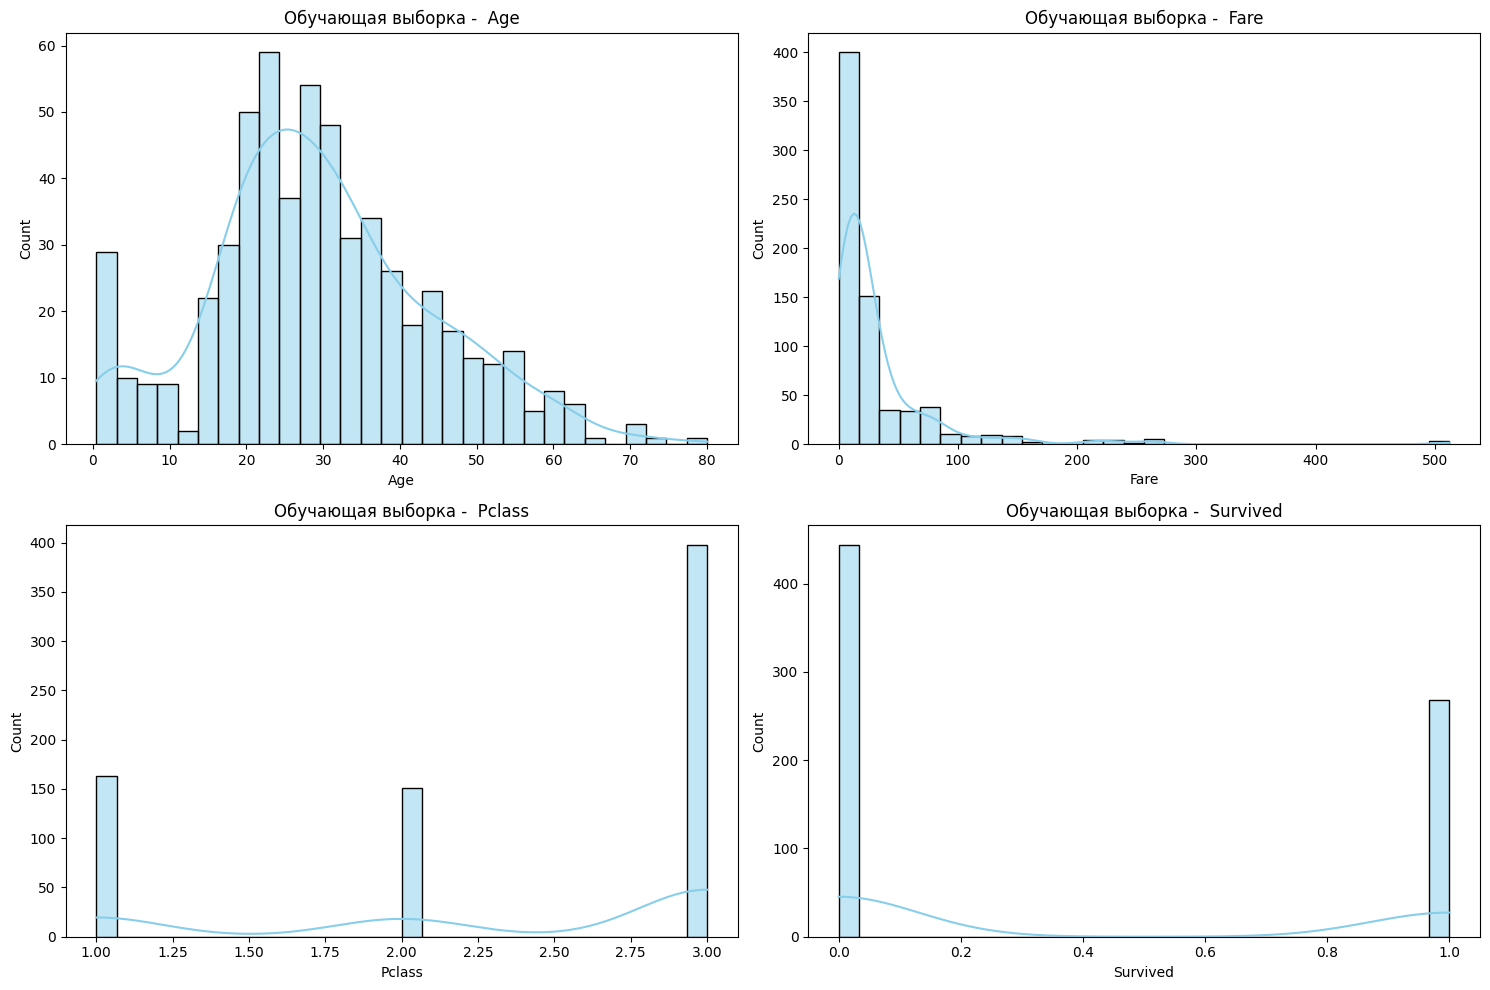

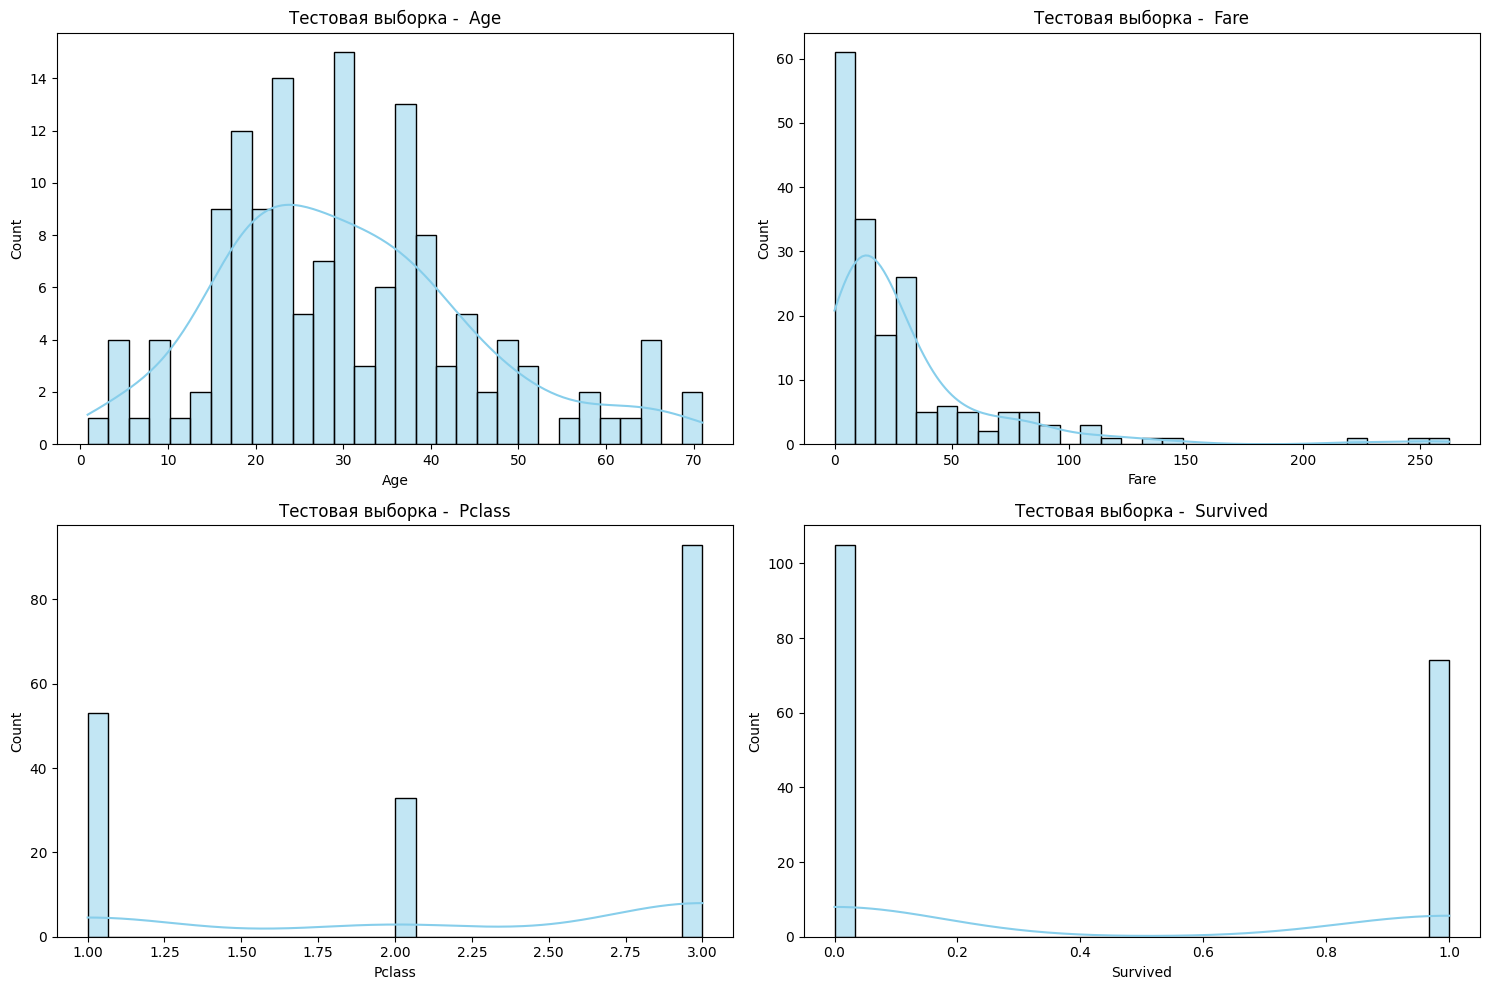

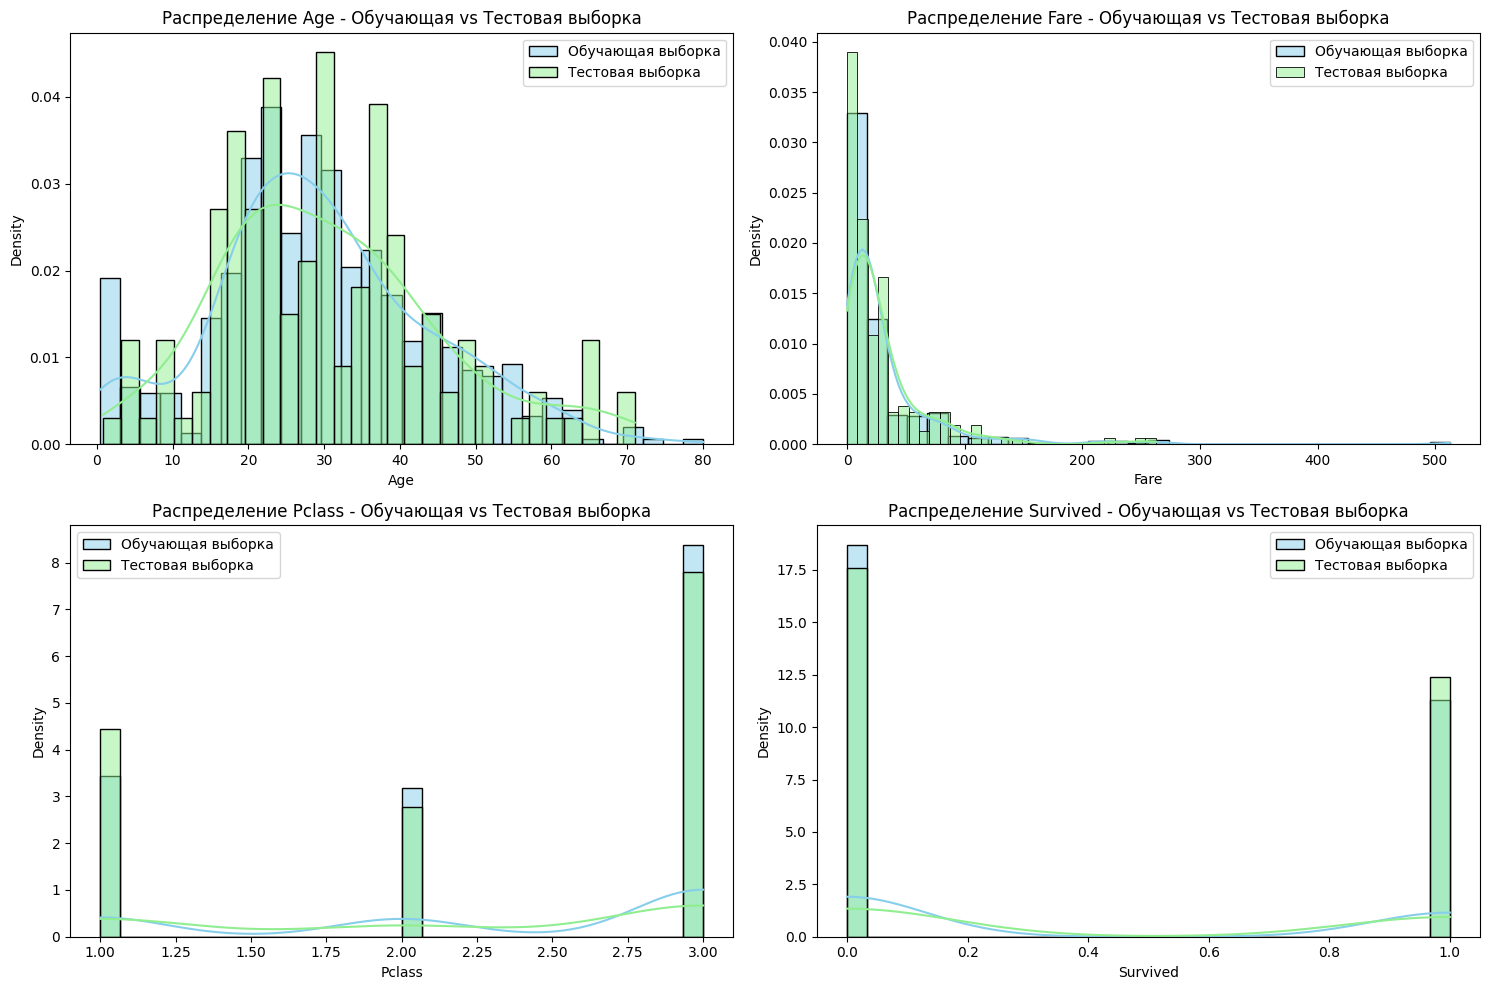

In [120]:
from sklearn.model_selection import train_test_split

X = training_set.drop('Survived', axis=1)
y = training_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_set = X_train.copy()
train_set['Survived'] = y_train

test_set = X_test.copy()
test_set['Survived'] = y_test

# Функция для построения гистограмм распределения
def plot_distribution(df, columns, title_prefix):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df[column], kde=True, bins=30, color='skyblue')
        plt.title(f'{title_prefix} {column}')
    plt.tight_layout()
    plt.show()

# Визуализация распределения атрибутов для обучающей выборки
plot_distribution(train_set, ['Age', 'Fare', 'Pclass', 'Survived'], 'Обучающая выборка - ')

# Визуализация распределения атрибутов для тестовой выборки
plot_distribution(test_set, ['Age', 'Fare', 'Pclass', 'Survived'], 'Тестовая выборка - ')

# Сравнение распределений
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Age', 'Fare', 'Pclass', 'Survived']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(train_set[column], kde=True, bins=30, color='skyblue', label='Обучающая выборка', stat='density')
    sns.histplot(test_set[column], kde=True, bins=30, color='lightgreen', label='Тестовая выборка', stat='density')
    plt.title(f'Распределение {column} - Обучающая vs Тестовая выборка')
    plt.legend()
plt.tight_layout()
plt.show()

12. Сбалансируйте классы в исходном датасете двумя способами:

In [123]:
training_set = pd.read_csv('titanic.csv')


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [125]:
# Преобразование категориальных признаков в числовые и обработка пропущенных значений
X = pd.get_dummies(training_set.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1), drop_first=True)

# Заполнение пропущенных значений медианой
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

y = training_set['Survived']

# Разделение данных на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Количество объектов в каждом классе
class_counts = y_train.value_counts()
min_class = class_counts.idxmin()
maj_class = class_counts.idxmax()

# Удаление лишних объектов мажоритарного класса
train_data = X_train.copy()
train_data['Survived'] = y_train

maj_class_indices = train_data[train_data['Survived'] == maj_class].index
random_indices = np.random.choice(maj_class_indices, len(maj_class_indices) - class_counts[min_class], replace=False)
balanced_train_data_undersample = train_data.drop(index=random_indices)

X_train_undersample = balanced_train_data_undersample.drop('Survived', axis=1)
y_train_undersample = balanced_train_data_undersample['Survived']

# Обучение модели на сбалансированном датасете (undersampling)
model_undersample = LogisticRegression(max_iter=1000)
model_undersample.fit(X_train_undersample, y_train_undersample)

# Предсказание и оценка эффективности
y_pred_undersample = model_undersample.predict(X_test)
print('Оценка модели на сбалансированном датасете (undersampling):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_undersample):.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_undersample))
print('Classification Report:')
print(classification_report(y_test, y_pred_undersample))

# Дублирование объектов миноритарного класса
min_class_indices = train_data[train_data['Survived'] == min_class].index
duplicate_indices = np.random.choice(min_class_indices, class_counts[maj_class] - class_counts[min_class], replace=True)
balanced_train_data_oversample = pd.concat([train_data, train_data.loc[duplicate_indices]])

X_train_oversample = balanced_train_data_oversample.drop('Survived', axis=1)
y_train_oversample = balanced_train_data_oversample['Survived']

# Обучение модели на сбалансированном датасете (oversampling)
model_oversample = LogisticRegression(max_iter=1000)
model_oversample.fit(X_train_oversample, y_train_oversample)

# Предсказание и оценка эффективности
y_pred_oversample = model_oversample.predict(X_test)
print('Оценка модели на сбалансированном датасете (oversampling):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_oversample):.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_oversample))
print('Classification Report:')
print(classification_report(y_test, y_pred_oversample))

Оценка модели на сбалансированном датасете (undersampling):
Accuracy: 0.79
Confusion Matrix:
[[83 22]
 [15 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       105
           1       0.73      0.80      0.76        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179

Оценка модели на сбалансированном датасете (oversampling):
Accuracy: 0.82
Confusion Matrix:
[[85 20]
 [12 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       105
           1       0.76      0.84      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.82      0.82       179



16. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

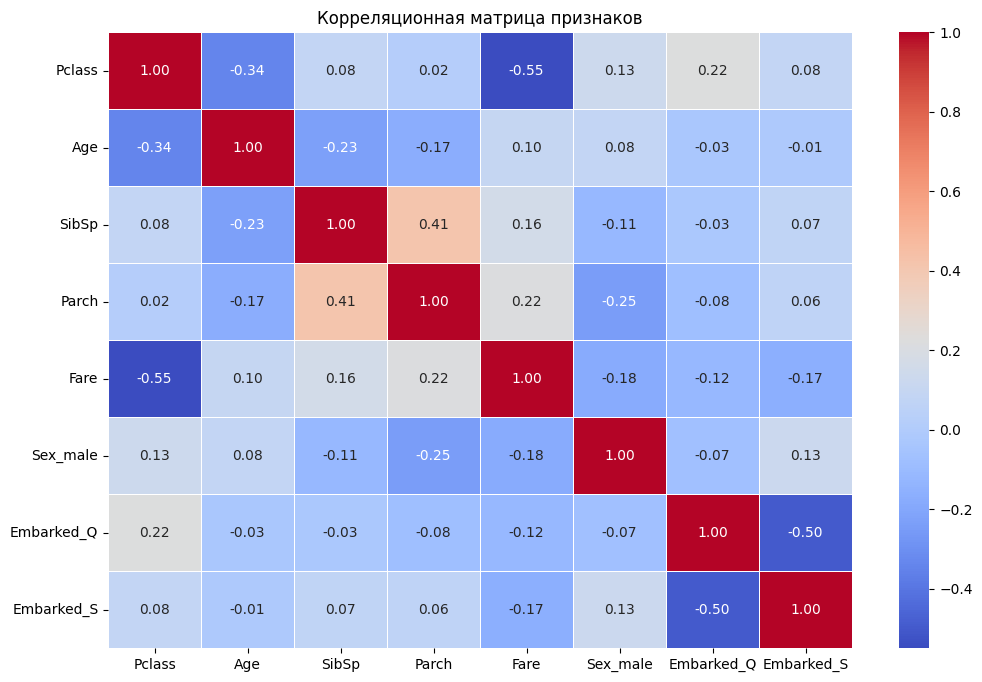

              Pclass       Age     SibSp     Parch      Fare  Sex_male  \
Pclass      1.000000 -0.339898  0.083081  0.018443 -0.549500  0.131900   
Age        -0.339898  1.000000 -0.233296 -0.172482  0.096688  0.081163   
SibSp       0.083081 -0.233296  1.000000  0.414838  0.159651 -0.114631   
Parch       0.018443 -0.172482  0.414838  1.000000  0.216225 -0.245489   
Fare       -0.549500  0.096688  0.159651  0.216225  1.000000 -0.182333   
Sex_male    0.131900  0.081163 -0.114631 -0.245489 -0.182333  1.000000   
Embarked_Q  0.221009 -0.031415 -0.026354 -0.081228 -0.117216 -0.074115   
Embarked_S  0.081720 -0.014665  0.070941  0.063036 -0.166603  0.125722   

            Embarked_Q  Embarked_S  
Pclass        0.221009    0.081720  
Age          -0.031415   -0.014665  
SibSp        -0.026354    0.070941  
Parch        -0.081228    0.063036  
Fare         -0.117216   -0.166603  
Sex_male     -0.074115    0.125722  
Embarked_Q    1.000000   -0.496624  
Embarked_S   -0.496624    1.000000  


In [126]:
# Преобразование категориальных признаков в числовые и обработка пропущенных значений
X = pd.get_dummies(training_set.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1), drop_first=True)

# Заполнение пропущенных значений медианой
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Построение корреляционной матрицы
corr_matrix = X.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()

# Анализ мультиколлинеарности
print(corr_matrix)

17. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

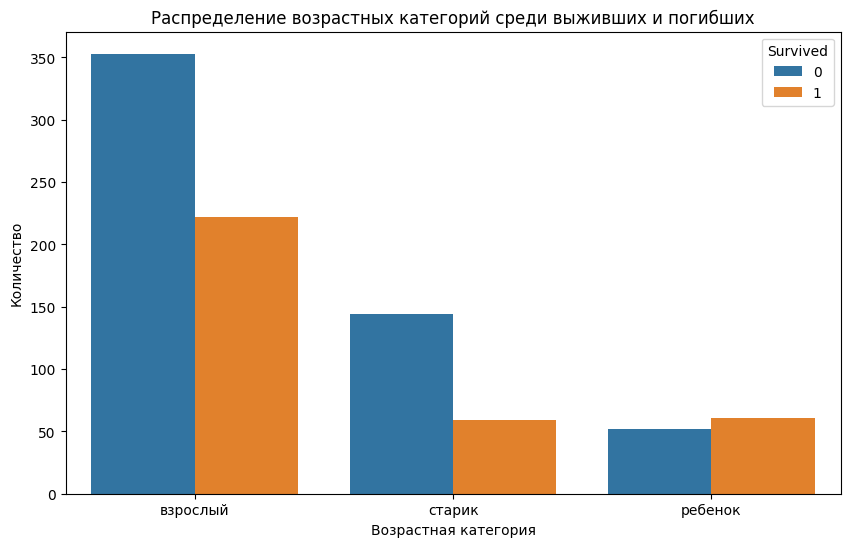

Оценка модели на датасете с новым признаком:
Accuracy: 0.82
Confusion Matrix:
[[91 14]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [127]:
# Функция для создания возрастной категории
def age_category(age):
    if age < 18:
        return 'ребенок'
    elif age < 60:
        return 'взрослый'
    else:
        return 'старик'

# Создание нового признака "возрастная категория"
training_set['AgeCategory'] = training_set['Age'].apply(age_category)

# Анализ распределения нового признака
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeCategory', hue='Survived', data=training_set)
plt.title('Распределение возрастных категорий среди выживших и погибших')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество')
plt.show()

# Преобразование категориального признака AgeCategory в числовой формат
training_set = pd.get_dummies(training_set, columns=['AgeCategory'], drop_first=True)

# Подготовка данных с новым признаком
X = pd.get_dummies(training_set.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1), drop_first=True)

# Заполнение пропущенных значений медианой
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

y = training_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Оценка модели на датасете с новым признаком:')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))